# 1- How many tennis players are included in the dataset?

In [320]:
import pandas as pd
MatchHomeTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchHomeTeamInfo.csv")
MatchAwayTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchAwayTeamInfo.csv")

home_players = MatchHomeTeamInfo['player_id']
away_players = MatchAwayTeamInfo['player_id']
all_players = pd.concat([home_players, away_players]).unique()
num_unique_players = len(all_players)
print(f'Total unique tennis players: {num_unique_players}')

Total unique tennis players: 2352


# 2. What is the average height of the players?

In [329]:
# Combine player info from both tables
players_info = pd.concat([MatchHomeTeamInfo[['player_id', 'height']], MatchAwayTeamInfo[['player_id', 'height']]])

# Remove duplicate players
unique_players = players_info.drop_duplicates(subset='player_id')

# Calculate average height
average_height = unique_players['height'].mean()

print(f'The average height of the players is: {average_height:.2f} m')

# fillna#########

The average height of the players is: 1.82 m


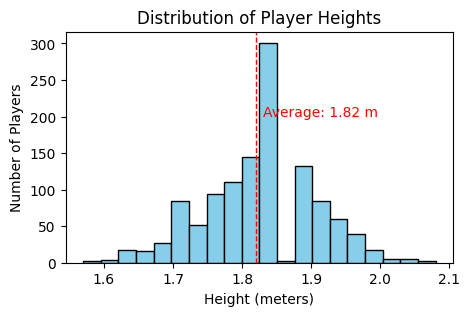

In [365]:
import matplotlib.pyplot as plt

# Plotting the distribution of player heights
plt.figure(figsize=(5, 3))
plt.hist(unique_players['height'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_height, color='red', linestyle='dashed', linewidth=1)
plt.text(average_height + 0.01, 200, f'Average: {average_height:.2f} m', color='red')
plt.xlabel('Height (meters)')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Heights')
plt.show()

# 3. Which player has the highest number of wins?

In [159]:
MatchEventInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchEventInfo.csv")
MatchEventInfo.head(5)

# Merge MatchEventInfo with MatchHomeTeamInfo and MatchAwayTeamInfo to get player IDs
merged_df = MatchEventInfo[['match_id', 'winner_code']].merge(MatchHomeTeamInfo[['match_id', 'player_id']], on='match_id', suffixes=('', '_home'))
merged_df = merged_df.merge(MatchAwayTeamInfo[['match_id', 'player_id']], on='match_id', suffixes=('', '_away')).drop_duplicates(subset="match_id")

# Map winner_code to actual player_id
merged_df['winner_id'] = merged_df.apply(
    lambda row: row['player_id'] if row['winner_code'] == 1.0 else row['player_id_away'], 
    axis=1
)

# Count the number of wins for each player
win_counts = merged_df['winner_id'].value_counts()

# Find the player with the highest number of wins
top_player_id = win_counts.idxmax()
top_player_wins = win_counts.max()

print(f'Player with the highest number of wins: {top_player_id}')
print(f'Number of wins: {top_player_wins}')

Player with the highest number of wins: 253356.0
Number of wins: 17


# 4. What is the longest match recorded in terms of duration?

In [412]:
MatchTimeInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchTimeInfo.csv")
MatchTimeInfo.head(5)
MatchTimeInfo = MatchTimeInfo.drop_duplicates(subset="match_id")
# Calculate the total duration of each match by summing the periods
MatchTimeInfo['total_duration'] = MatchTimeInfo[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)
MatchTimeInfo = MatchTimeInfo[MatchTimeInfo['total_duration'] > 0]
MatchTimeInfo['total_duration_hours'] = MatchTimeInfo['total_duration'] / 3600
# Perform a sanity check by filtering out any unreasonably long matches (e.g., > 24 hours)
reasonable_matches = MatchTimeInfo[MatchTimeInfo['total_duration'] <= 12*3600]
# Find the match with the longest duration
longest_match = reasonable_matches.loc[reasonable_matches['total_duration'].idxmax()]
longest_match_hours = longest_match/3600
print("Longest match recorded in terms of duration:")
print(f"Match ID: {longest_match['match_id']}")
print(f"Duration: {longest_match['total_duration']} seconds, equal to {longest_match_hours['total_duration']} hours" )



Longest match recorded in terms of duration:
Match ID: 12346456.0
Duration: 30465.0 seconds, equal to 8.4625 hours


In [413]:
reasonable_matches.sort_values(by='total_duration', ascending=False)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_duration,total_duration_hours
18916,12346456,25797.0,2887.0,1781.0,NaN,NaN,1.717186e+09,30465.0,8.462500
4574,12313669,3595.0,2489.0,22415.0,NaN,NaN,1.715202e+09,28499.0,7.916389
16996,12371237,24798.0,1816.0,1722.0,NaN,NaN,1.716828e+09,28336.0,7.871111
19304,12381286,26030.0,2206.0,NaN,NaN,NaN,1.717094e+09,28236.0,7.843333
19394,12346345,2878.0,2734.0,19016.0,2553.0,NaN,1.717258e+09,27181.0,7.550278
...,...,...,...,...,...,...,...,...,...
3451,12311868,5.0,5.0,NaN,NaN,NaN,1.715072e+09,10.0,0.002778
8795,12334984,5.0,5.0,NaN,NaN,NaN,1.715763e+09,10.0,0.002778
3347,12311067,5.0,4.0,NaN,NaN,NaN,1.715085e+09,9.0,0.002500
105,12291498,3.0,5.0,NaN,NaN,NaN,1.714558e+09,8.0,0.002222


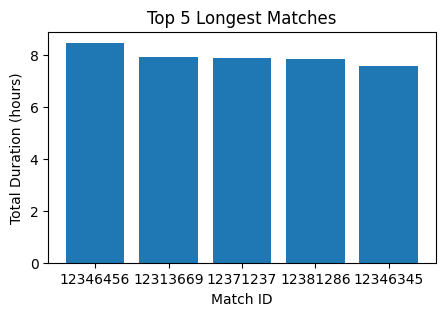

In [414]:
import matplotlib.pyplot as plt

# Plotting the top 5 longest matches
top_5_longest = reasonable_matches.nlargest(5, 'total_duration_hours')
plt.figure(figsize=(5, 3))
plt.bar(top_5_longest['match_id'].astype(str), top_5_longest['total_duration_hours'])
plt.xlabel('Match ID')
plt.ylabel('Total Duration (hours)')
plt.title('Top 5 Longest Matches')
plt.show()

# 6. Which country has produced the most successful tennis players? 
#### prize approach

In [433]:
# Combine MatchHomeTeamInfo and MatchAwayTeamInfo to aggregate data
combined_teams = pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo], ignore_index=True)

# Group by country and sum the total prize money
total_prize_per_country = combined_teams.groupby('country')['total_prize'].sum()
# Find the country with the highest total prize money earned
most_successful_country = total_prize_per_country.idxmax()
max_total_prize = total_prize_per_country.max()

# Print the result
print(f"The country that has produced the most successful tennis players based on total prize money earned is {most_successful_country} with total prize money of ${max_total_prize}.")

The country that has produced the most successful tennis players based on total prize money earned is Serbia with total prize money of $2864742758.0.


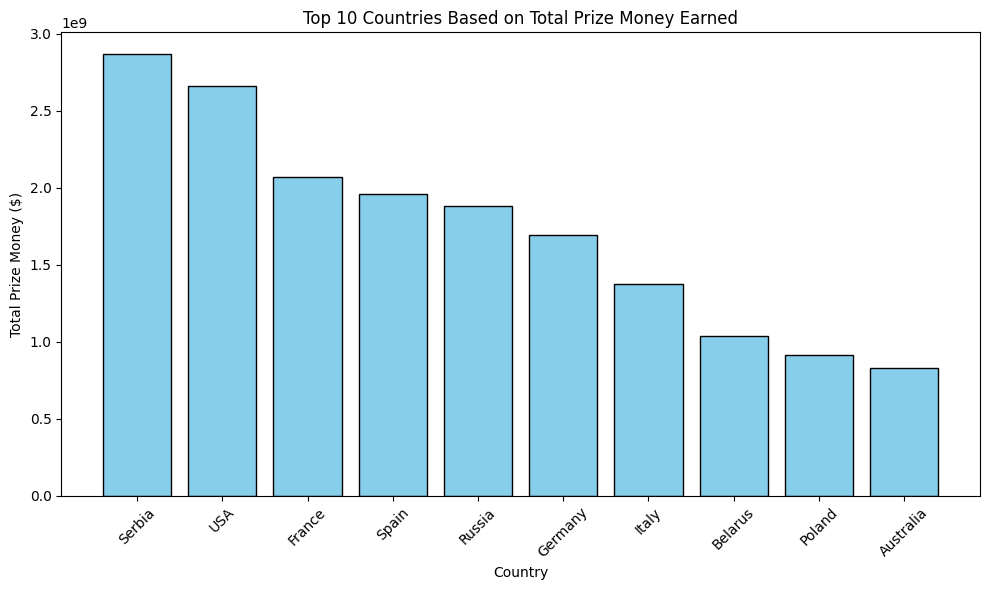

In [513]:
import matplotlib.pyplot as plt

# Sort by total prize in descending order and select top 10 countries
top_10_countries = total_prize_per_country.sort_values( ascending=False).head(10)
top_10_countries = top_10_countries.reset_index()

# Plotting the top 10 countries based on total prize money
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['country'], top_10_countries['total_prize'], color='skyblue', edgecolor='black')
plt.title('Top 10 Countries Based on Total Prize Money Earned')
plt.xlabel('Country')
plt.ylabel('Total Prize Money ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Which country has produced the most successful tennis players? 
#### wins approach

In [512]:
# Merge MatchEventInfo with MatchHomeTeamInfo and MatchAwayTeamInfo to get player IDs
merged_df_country = MatchEventInfo[['match_id', 'winner_code']].merge(MatchHomeTeamInfo[['match_id', 'player_id' , 'country']], on='match_id', suffixes=('', '_home'))
merged_df_country = merged_df_country.merge(MatchAwayTeamInfo[['match_id', 'player_id' , 'country']], on='match_id', suffixes=('', '_away')).drop_duplicates(subset="match_id")
# Map winner_code to actual player_id
merged_df_country['winner_id'] = merged_df_country.apply(
    lambda row: row['player_id'] if row['winner_code'] == 1.0 else row['player_id_away'], 
    axis=1
)
merged_df_country = merged_df_country.rename (columns={'player_id':'player_id_home' , 'country':'country_home'})

# Calculate win counts based on countries
win_counts_home = merged_df_country.loc[merged_df_country['winner_id'] == merged_df_country["player_id_home"], 'country_home'].value_counts()
win_counts_away = merged_df_country.loc[merged_df_country['winner_id'] == merged_df_country["player_id_away"], 'country_away'].value_counts()


# # Combine and sum win counts for each country
win_counts = win_counts_home.add(win_counts_away, fill_value=0).astype(int)
max_wins_country = win_counts.idxmax()
max_wins_count = win_counts.max()


print(f"\nThe country with the maximum wins is {max_wins_country} with {max_wins_count} wins.")


The country with the maximum wins is USA with 422 wins.


In [516]:
win_counts ["Serbia"]

117

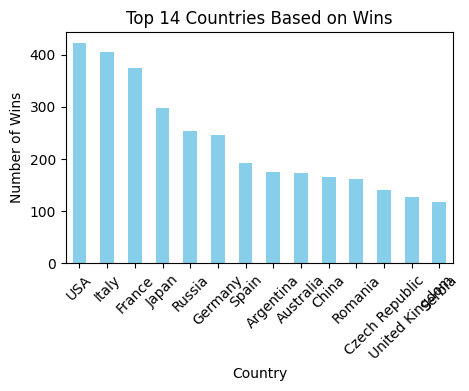

In [519]:
top_10_countries = win_counts.nlargest(14)

plt.figure(figsize=(5, 3))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 14 Countries Based on Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

# 8. Is there a difference in the number of double faults based on gender?

In [532]:
PeriodInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\PeriodInfo.csv")

# Filter rows where the statistic_name is "double_faults"
double_faults_data = PeriodInfo[(PeriodInfo['statistic_name'] == 'double_faults') & (PeriodInfo['period'] == 'ALL')]

# Merge with MatchHomeTeamInfo to get home team gender and double faults
home_merged = pd.merge(double_faults_data, MatchHomeTeamInfo[['match_id', 'gender' , 'player_id']], on='match_id').drop_duplicates(subset='match_id')
home_double_faults = home_merged[['gender', 'home_stat','player_id']].rename(columns={'home_stat': 'double_faults'})

# Merge with MatchAwayTeamInfo to get away team gender and double faults
away_merged = pd.merge(double_faults_data, MatchAwayTeamInfo[['match_id', 'gender','player_id']], on='match_id').drop_duplicates(subset='match_id')
away_double_faults = away_merged[['gender', 'away_stat','player_id']].rename(columns={'away_stat': 'double_faults'})

# Combine home and away double faults
combined_double_faults = pd.concat([home_double_faults, away_double_faults])

# Convert double_faults to numeric
combined_double_faults['double_faults'] = pd.to_numeric(combined_double_faults['double_faults'])

# Group by gender and calculate the total number of double faults
double_faults_by_gender = combined_double_faults.groupby('gender')['double_faults'].sum()

# Calculate total number of females and males
gender_counts = combined_double_faults['gender'].value_counts()

# Calculate the ratio of double faults to the total count for each gender
ratios = double_faults_by_gender / gender_counts

print(ratios)


gender
F    3.541608
M    2.646076
dtype: float64


In [539]:
import scipy.stats as stats

male_combined_double_faults = combined_double_faults[combined_double_faults['gender'] == 'M']
female_combined_double_faults = combined_double_faults[combined_double_faults['gender'] == 'F']

t_statistic, p_value = stats.ttest_ind (male_combined_double_faults['double_faults'],
                                        female_combined_double_faults['double_faults'])
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print ('Samples shows significant difference (reject H0)')
    print ('so there is significant difference the number of double faults based on gender')
else:
    print ( 'Samples dose not show significant difference  (fail to reject H0)')
    print ('so there is not significant difference the number of double faults based on gender')

T-statistic: -18.598815378195127, p-value: 4.3727670450299826e-76
Samples shows significant difference (reject H0)
so there is significant difference the number of double faults based on gender


# 10. Is there a correlation between a player's height and their ranking?

In [541]:
all_players = pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo])

# Drop duplicates and keep the last record of each match_id
all_players_drop_dup = all_players.drop_duplicates(subset=['match_id','name'], keep='last')

correlation_coeff = all_players_drop_dup['height'].corr(all_players_drop_dup['current_rank'])

print("Correlation coefficient between height and ranking:", correlation_coeff,
"\nThis value indicates a very weak positive correlation between these two variables")


Correlation coefficient between height and ranking: 0.11243439094485426 
This value indicates a very weak positive correlation between these two variables


Correlation coefficient between height and ranking is: 0.11243439094485426


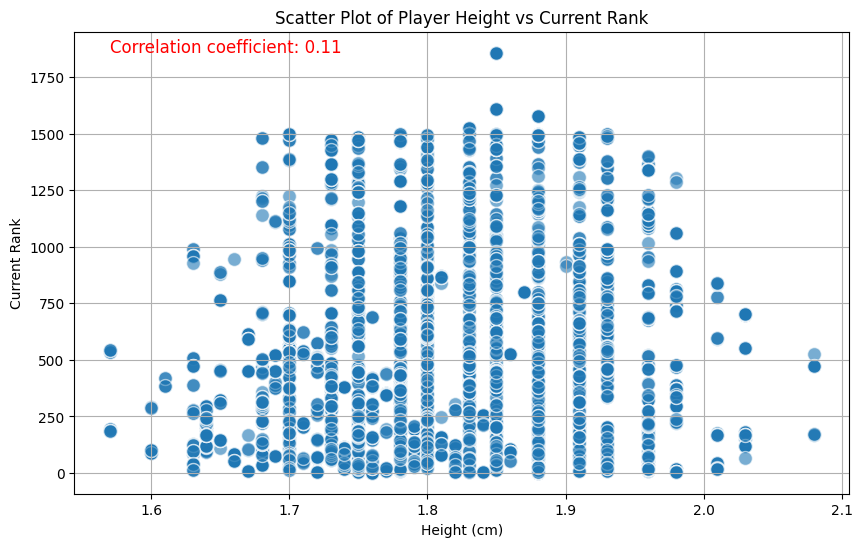

In [540]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine MatchHomeTeamInfo and MatchAwayTeamInfo
all_players = pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo])

# Drop duplicates and keep the last record of each match_id and player name
all_players_drop_dup = all_players.drop_duplicates(subset=['match_id', 'name'], keep='last')

# Calculate the correlation coefficient
correlation_coeff = all_players_drop_dup['height'].corr(all_players_drop_dup['current_rank'])
print(f"Correlation coefficient between height and ranking is: {correlation_coeff}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(all_players_drop_dup['height'], all_players_drop_dup['current_rank'], alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of Player Height vs Current Rank')
plt.xlabel('Height (cm)')
plt.ylabel('Current Rank')
plt.grid(True)
plt.text(min(all_players_drop_dup['height']), max(all_players_drop_dup['current_rank']),
         f'Correlation coefficient: {correlation_coeff:.2f}', fontsize=12, color='red')
plt.show()

# 12. What is the average number of games per set in men's matches compared to women's matches?

In [144]:
GameInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\GameInfo.csv")

GameInfo_with_gender = pd.merge(GameInfo, all_players, on='match_id')

# Drop duplicates and keep the last record based on set_id and game_id
GameInfo_with_gender_cleaned = GameInfo_with_gender.sort_values(by=['match_id', 'set_id', 'game_id']).drop_duplicates(subset=['match_id', 'set_id'], keep='last')

GameInfo_with_gender_cleaned=GameInfo_with_gender_cleaned[["match_id" ,"game_id" , "gender" ]]
GameInfo_Male_cleaned = GameInfo_with_gender_cleaned[GameInfo_with_gender_cleaned['gender'] == 'M']
GameInfo_Female_cleaned = GameInfo_with_gender_cleaned[GameInfo_with_gender_cleaned['gender'] == 'F']
avg_games_per_set_men = GameInfo_Male_cleaned["game_id"].mean()
avg_games_per_set_women = GameInfo_Female_cleaned["game_id"].mean()

# Print the results
print(f"Average number of games per set in men's matches: {avg_games_per_set_men}")
print(f"Average number of games per set in women's matches: {avg_games_per_set_women}")

Average number of games per set in men's matches: 9.213686958911639
Average number of games per set in women's matches: 8.931094383323682


In [542]:
t_statistic, p_value = stats.ttest_ind (GameInfo_Male_cleaned["game_id"],
                                        GameInfo_Female_cleaned["game_id"])
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print ('Samples shows significant difference (reject H0)')
    print ('so there is significant difference between average number of games per set based on gender')
else:
    print ( 'Samples dose not show significant difference  (fail to reject H0)')
    print ('so there is not significant difference average between number of games per set based on gender')

T-statistic: 7.739154137176257, p-value: 1.0681743235485147e-14
Samples shows significant difference (reject H0)
so there is significant difference between average number of games per set based on gender


C:\Users\SilkRoadit.com\AppData\Local\Temp\ipykernel_15428\828997570.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Men', 'Women'], patch_artist=True,


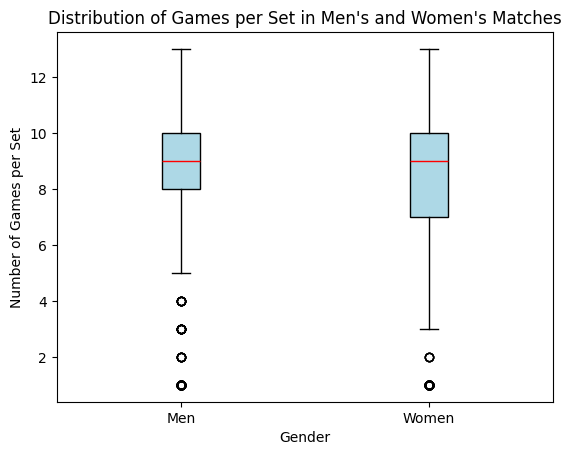

In [543]:
data = [GameInfo_Male_cleaned['game_id'], GameInfo_Female_cleaned['game_id']]

# Create boxplot
plt.boxplot(data, labels=['Men', 'Women'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

# Add title and labels
plt.title('Distribution of Games per Set in Men\'s and Women\'s Matches')
plt.xlabel('Gender')
plt.ylabel('Number of Games per Set')

# Show the plot
plt.show()

# 14. What is the most common type of surface used in tournaments?

In [152]:
MatchTournamentInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchTournamentInfo.csv")

# Count the occurrences of each ground type
surface_counts = MatchTournamentInfo['ground_type'].value_counts()

# Identify the most common surface type
most_common_surface = surface_counts.idxmax()
most_common_surface_count = surface_counts.max()

print(f"The most common type of surface used in tournaments is: {most_common_surface}")
print(f"Number of tournaments using this surface: {most_common_surface_count}")

The most common type of surface used in tournaments is: Red clay
Number of tournaments using this surface: 14545


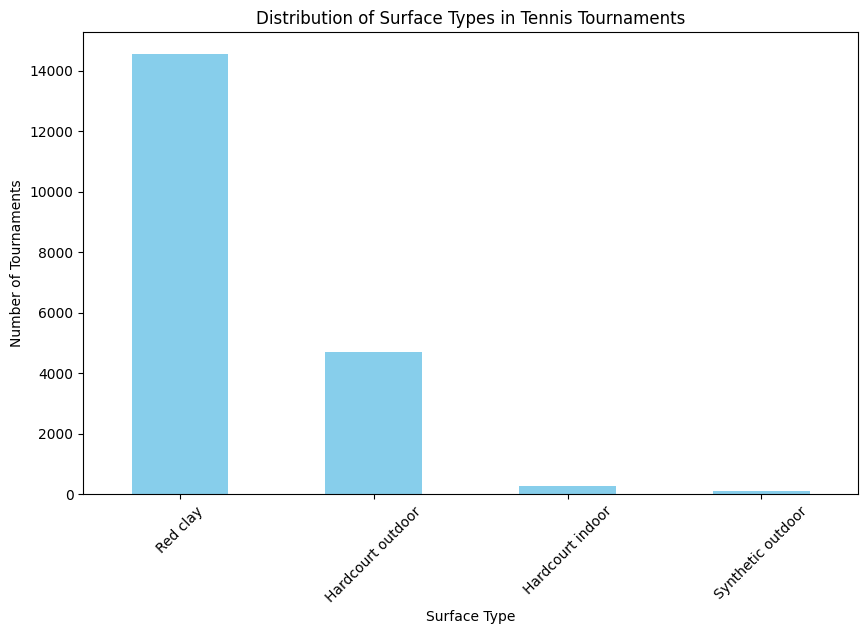

In [545]:
# Create a bar plot to visualize the distribution of surface types
plt.figure(figsize=(10, 6))
surface_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Surface Types in Tennis Tournaments')
plt.xlabel('Surface Type')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=45)
plt.show()

# 16. Which player has the highest winning percentage against top 10 ranked opponents?

In [549]:
# Merge MatchEventInfo with MatchHomeTeamInfo and MatchAwayTeamInfo to get player IDs
merged = MatchEventInfo[['match_id', 'winner_code']].merge(MatchHomeTeamInfo[['match_id', 'player_id' , 'current_rank']], on='match_id', suffixes=('', '_home'))
merged = merged.merge(MatchAwayTeamInfo[['match_id', 'player_id' , 'current_rank']], on='match_id', suffixes=('', '_away')).drop_duplicates(subset="match_id")

# Map winner_code to actual player_id
merged['winner_id'] = merged.apply(
    lambda row: row['player_id'] if row['winner_code'] == 1.0 else row['player_id_away'], 
    axis=1
)

merged['looser_id'] = merged.apply(
    lambda row: row['player_id_away'] if row['winner_code'] == 1.0 else row['player_id'], 
    axis=1
)
merged['looser_rank'] = merged.apply(
    lambda row: row['winner_code'] if row['winner_code'] == 1.0 else row['player_id'], 
    axis=1
)

# Filter matches where the winner's rank is in the top 10
top_10_matches = merged[merged['current_rank'] <= 10]

# Count total matches and wins against top 10 ranked opponents for each player
win_counts = top_10_matches.groupby('winner_id')['match_id'].count()
top_10_wins = top_10_matches[top_10_matches['winner_code'] == 1.0].groupby('winner_id')['match_id'].count()

# Calculate winning percentage against top 10 ranked opponents
winning_percentage = (top_10_wins / win_counts) * 100

# Identify the player with the highest winning percentage
player_with_highest_percentage = winning_percentage.idxmax()
highest_percentage = winning_percentage.max()

print(f"The player with the highest winning percentage against top 10 ranked opponents is Player ID: {player_with_highest_percentage}")
print(f"Winning Percentage: {highest_percentage:.2f}%")


The player with the highest winning percentage against top 10 ranked opponents is Player ID: 14882.0
Winning Percentage: 100.00%


In [551]:
top_10_matches

,match_id,winner_code,player_id,current_rank,player_id_away,current_rank_away,winner_id,looser_id,looser_rank
1,12260076,1.0,206570,2.0,90080,18.0,206570.0,90080.0,1.0
3,12260078,1.0,106755,6.0,275923,3.0,106755.0,275923.0,1.0
12,12260083,2.0,206570,2.0,192013,21.0,192013.0,206570.0,206570.0
1243,12260084,2.0,163504,4.0,254742,23.0,254742.0,163504.0,163504.0
1247,12261592,1.0,228272,1.0,35424,16.0,228272.0,35424.0,1.0
...,...,...,...,...,...,...,...,...,...
54279,12346346,2.0,106755,6.0,299538,35.0,299538.0,106755.0,106755.0
54620,12346463,1.0,264983,3.0,189986,32.0,264983.0,189986.0,1.0
56603,12346342,1.0,57163,4.0,122368,25.0,57163.0,122368.0,1.0
56847,12346468,2.0,257784,8.0,262594,70.0,262594.0,257784.0,257784.0


In [548]:
merged


,match_id,winner_code,player_id,current_rank,player_id_away,current_rank_away,winner_id,looser_id,looser_rank
0,12260075,2.0,14486,276.0,254742,24.0,254742.0,14486.0,14486.0
1,12260076,1.0,206570,2.0,90080,18.0,206570.0,90080.0,1.0
2,12260077,2.0,46391,39.0,275923,3.0,275923.0,46391.0,46391.0
3,12260078,1.0,106755,6.0,275923,3.0,106755.0,275923.0,1.0
7,12260080,1.0,221012,23.0,57163,4.0,221012.0,57163.0,1.0
...,...,...,...,...,...,...,...,...,...
57690,12384892,2.0,17065,561.0,146040,312.0,146040.0,17065.0,17065.0
57691,12384975,1.0,96061,344.0,103375,200.0,96061.0,103375.0,1.0
57692,12385017,1.0,254281,527.0,120664,647.0,254281.0,120664.0,1.0
57693,12385869,2.0,154486,1149.0,103913,611.0,103913.0,154486.0,154486.0


In [309]:
looser_winner

,winner_id,looser_id,match_id
0,14414.0,15894.0,1
1,14414.0,248846.0,1
2,14414.0,325141.0,1
3,14486.0,57163.0,1
4,14486.0,170946.0,1
...,...,...,...
5186,504580.0,315054.0,1
5187,510360.0,51736.0,1
5188,510360.0,222299.0,1
5189,510360.0,414826.0,1


In [318]:
MatchTimeInfo

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_duration
0,12260075,3463.0,3855.0,NaN,NaN,NaN,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,NaN,NaN,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,NaN,NaN,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,NaN,NaN,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,NaN,NaN,NaN,1.714483e+09,5382.0
...,...,...,...,...,...,...,...,...
19671,12384975,2218.0,4709.0,7140.0,NaN,NaN,1.717248e+09,14067.0
19672,12385017,3295.0,4903.0,4413.0,NaN,NaN,1.717258e+09,12611.0
19673,12385869,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19674,12385873,NaN,NaN,NaN,NaN,NaN,NaN,0.0
